<h1 align=center><font size=5>Logistic Regression on Breast Cancer Dataset</font></h1>

### Table of contents


- [Data](#data)
- [Data Wrangling](#data_wrangling)
- [Data Statistics](#data_stats)
- [Exploratory Data Analysis](#data_exp)
- [Data Preparation](#data_prep)
- [Logistic Regression from Scratch](#LR_scratch)
- [Logistic Regression using Sklearn](#LR_sklearn)

### Data <a id="data"></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
print('Number of features:', len(dataset.feature_names))

Number of features: 30


### Data Wrangling <a id="data_wrangling"></a>

Herer I am converting the dataset into Pandas dataframe for easier data processing.

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['Cancer'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Data Statistics <a id="data_stats"></a>

Here I am describing the statistics of the data including the central tendency, dispersion and shape of the dataset’s distribution.

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
print("Mean Values in the Distribution")
print(df.mean())
print("*******************************")
print("Median Values in the Distribution")
print(df.median())
print("*******************************")
print("Mode of the Distribution")
print(df.mode().head(1))

Mean Values in the Distribution
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness 

In [ ]:
print("Shape of the Distribution")
print(df.shape)

Shape of the Distribution
(569, 31)


Here I am checking if there is any missing values in the dataset.

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Cancer                     0
dtype: int64

### Exploratory Data Analysis <a id="data_exp"></a>

Here I am measuring the correlation among the features using a heat map.

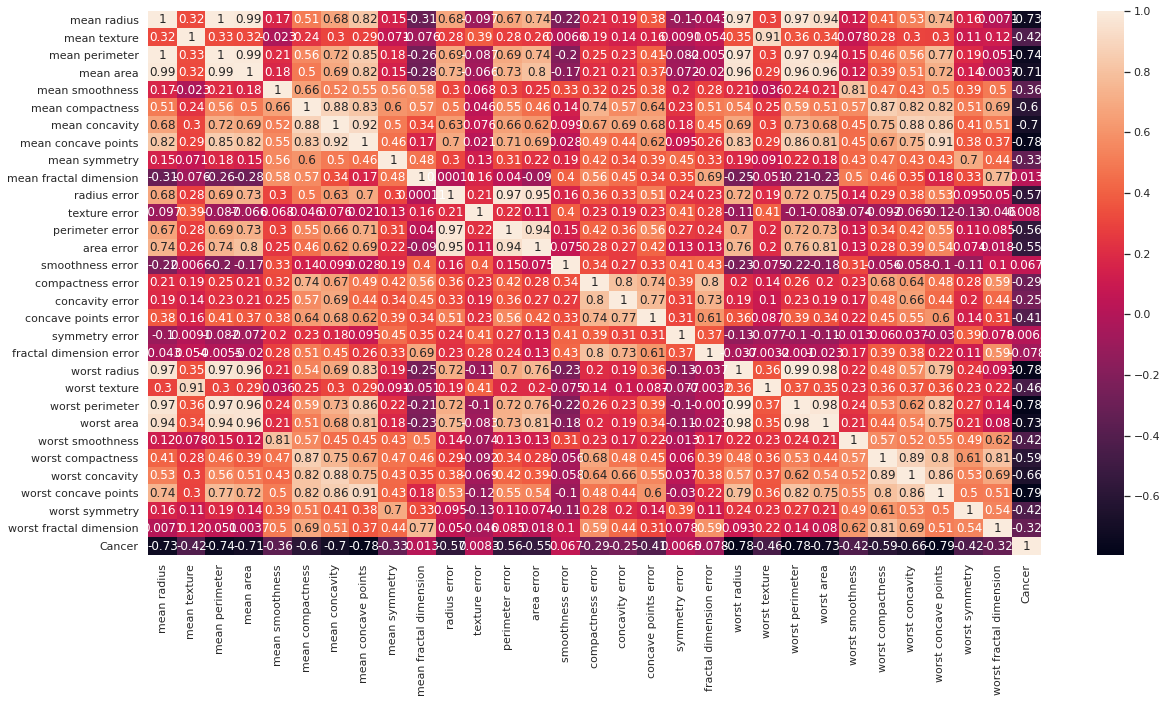

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

correlation_matrix = df.corr()
sns.heatmap(data= correlation_matrix, annot=True)

#VIF

Here I am using a pair plot of the features "worst radius", "worst texture", "worst perimeter", and "worst area", using Cancer as the target variable.

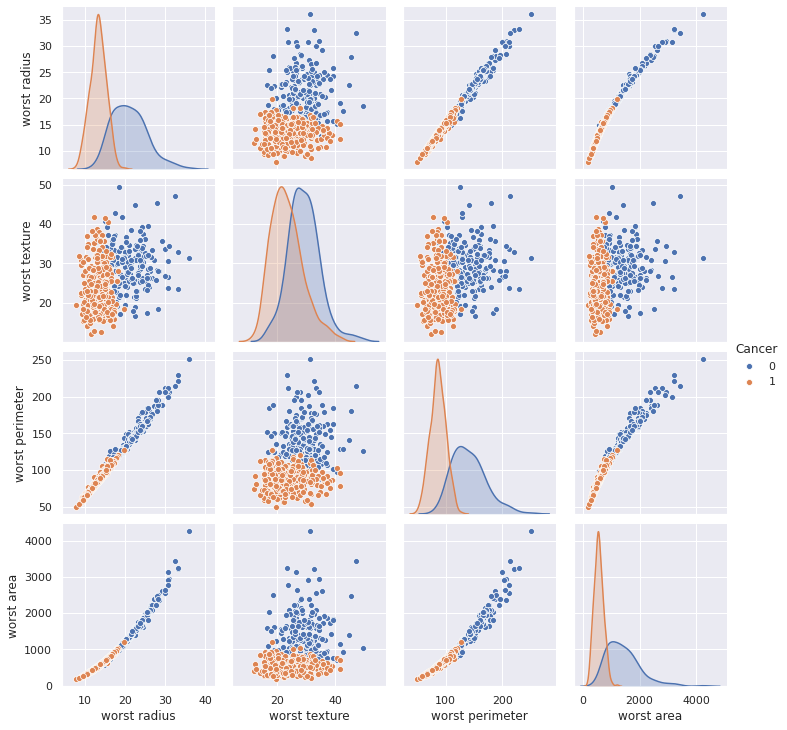

In [ ]:
sns.pairplot(vars=["worst radius", "worst texture", 'worst perimeter', 'worst area'] , data=df , hue='Cancer')
plt.show()

The best correlations are

- radius and perimeter
- radius and area
- perimeter and area

Overall These have clear boundries between having cancer and not.

Below I am showing the classification distribution?

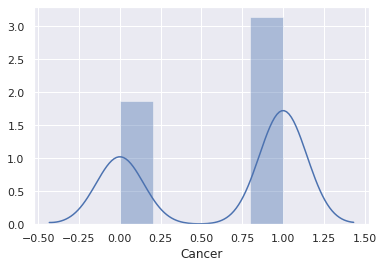

In [ ]:
plt.figure(figsize=(6,4))

sns.distplot(df['Cancer'])

### Data Preparation <a id="data_prep"></a>

Here I am defining the predictor variable 'X' and target variable 'y'.

In [ ]:
X = df[["worst radius", "worst texture", 'worst perimeter', 'worst area']].astype(float)
y = df['Cancer']

X.head()

,worst radius,worst texture,worst perimeter,worst area
0,25.38,17.33,184.60,2019.0
1,24.99,23.41,158.80,1956.0
2,23.57,25.53,152.50,1709.0
3,14.91,26.50,98.87,567.7
4,22.54,16.67,152.20,1575.0


Here I am spliting the data in a stratified fashion into training set with 80% of the samples and test set with the remaining 20%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (455, 4)
X_test shape: (114, 4)


Here I am standardizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import numpy as np

### Logistic Regression from Scratch <a id="LR_scratch"></a>

Here I am implementing logistic regression from scratch.
I used the reference about logistic regression here: https://www.internalpointers.com/post/cost-function-logistic-regression

In [ ]:
class Logistic_Regression_S:
    #global theta
    def __init__(self, lrn= 0.01, num_iter= 100):
        #self.theta = np.zeros(X.shape[1])
        self.lrn = lrn
        self.num_iter = num_iter
    
    # Add intercept to input X
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Define the sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Define the cross entropy loss
    def loss(self, y, h):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Fit the model
    def fit(self, X, y):
        
        # Add intercept to X
        X = self.add_intercept(X)
        
        # Initialize parameter theta
        self.theta = np.zeros(X.shape[1])
        
        
        loss_history = []
        for i in range(self.num_iter):
            # Calculate output h
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            
            # Calculate the loss and save it in loss_history
            loss_history.append(self.loss(y, h))
            
            # Calculate gradients
            gradient = np.dot(X.T, (h - y)) / y.size
            
            # Update theta parameters
            #print(type(lr))
            #print(type(gradient))
            self.theta -= self.lrn * gradient
        
        return loss_history

            
    # Calculate probability estimates
    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X,self.theta))   
    
    # Predict class labels for samples in X
    def predict(self, X):   
        return self.predict_prob(X).round()

In [ ]:
import numpy as np

# Create an instance of the above class
lrs = Logistic_Regression_S()

# Fit the model over training set
J = lrs.fit(X_train,y_train)

# Make predictions over test set
y_test_pred_S = lrs.predict(X_test)

# Measure accuracy over test set
index = 0
count = 0
for i in y_test:
    #print(i)
    if (i == y_test_pred_S[index]):
      count = count + 1
      #print('count: %i, index: %i' %(count,index))
    
    index = index + 1


accuracy = (count/len(y_test_pred_S))
print('Testing Accuracy over test set:', accuracy)

Testing Accuracy over test set: 0.9473684210526315


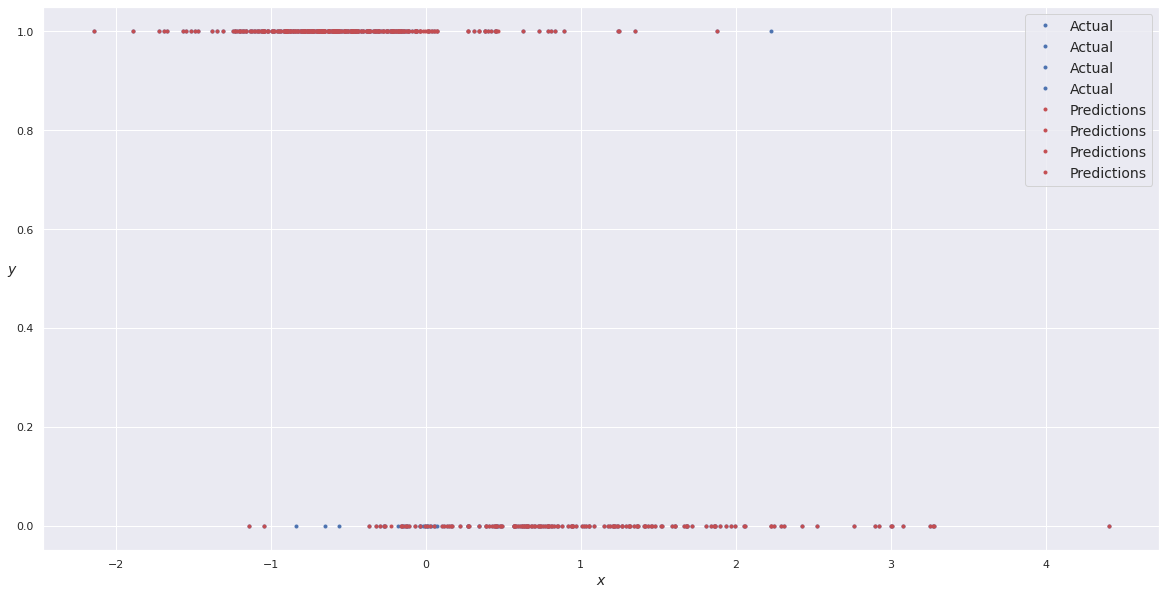

In [ ]:
plt.plot(X_test, y_test, "b.", label = 'Actual')
plt.plot(X_test, y_test_pred_S, "r.", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.show()

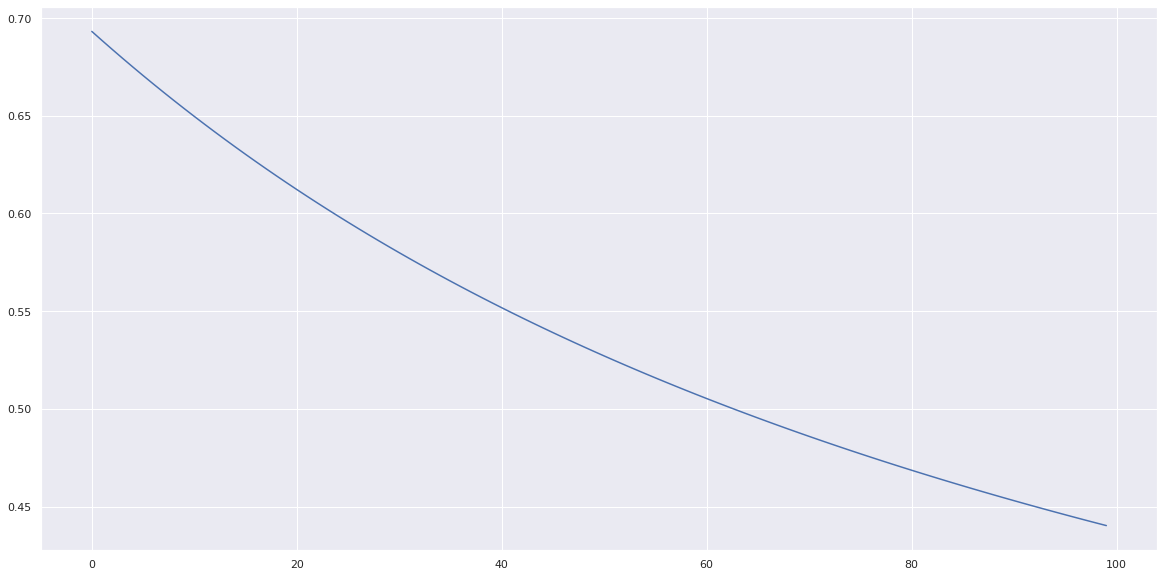

In [ ]:
# Plot loss vs training iterations

plt.plot(J)

### Logistic Regression using Sklearn <a id="LR_sklearn"></a>

Here I am calculate linear regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here I am measuring the classification accuracy over the training/test sets.

In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.94
Testing Accuracy: 0.96


Here I am building a text report showing the main classification metrics including precision, recall, f1-score, and accuracy.

In [ ]:
from sklearn.metrics import classification_report

report = (classification_report(y_test, y_test_pred, target_names=dataset.target_names))
print(report)

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Here I am computing and plotting the confusion matrix.

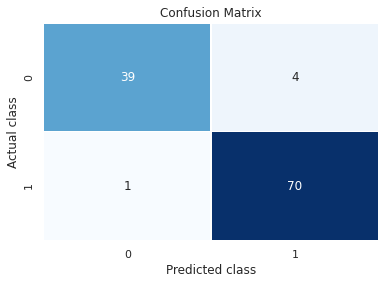

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6,4))

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion Matrix");